In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 9.9 MB 21.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


import pmdarima as pmd
from pmdarima import model_selection

import pandas_datareader as pdr

In [ ]:
# Importing data from FRED
df1 = pdr.DataReader('LAUST060000000000003A', 'fred', "1976-01-01")
df2 = pdr.DataReader('UNRATENSA', 'fred', "1948-01-01")

# Renaming columns
df2.rename(columns={'UNRATENSA': 'URate'}, inplace=True)
df1.rename(columns={'LAUST060000000000003A': 'URate'}, inplace=True)

df2.head()

,URate
DATE,
1948-01-01,4.0
1948-02-01,4.7
1948-03-01,4.5
1948-04-01,4.0
1948-05-01,3.4


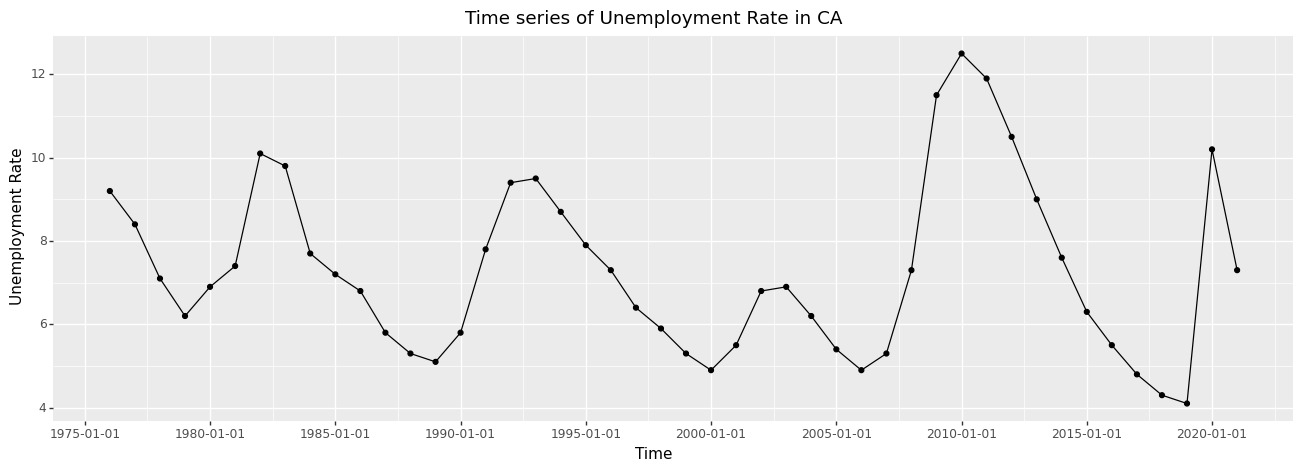

<ggplot: (8769670643157)>

In [ ]:
# Plotting Time Series
(
    ggplot(df1,aes(df1.index,'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate in CA") +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

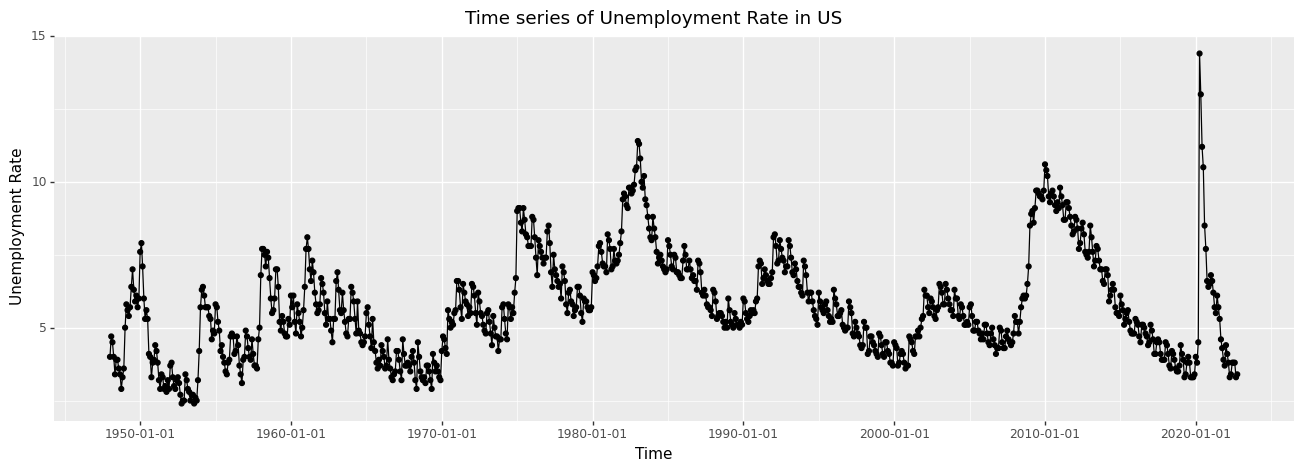

<ggplot: (8769668950861)>

In [ ]:
# Plotting Time Series
(
    ggplot(df2,aes(df2.index,'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate in US") +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

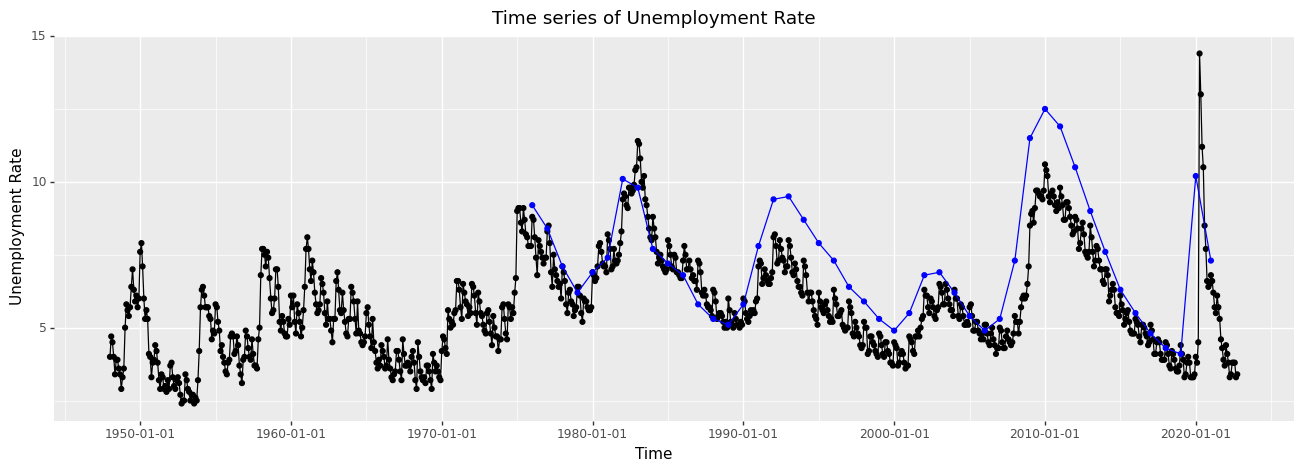

<ggplot: (8769668947421)>

In [ ]:
# Plotting Time Series
(
    ggplot(df2,aes(df2.index,'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate") +
    geom_point(df1,aes(df1.index,'URate'),color='blue') + geom_line(df1, aes(df1.index,'URate'),color='blue') +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

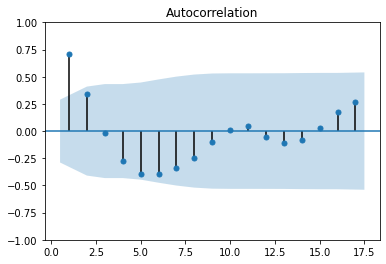

In [ ]:
plot_acf(df1,missing="drop",zero=False);

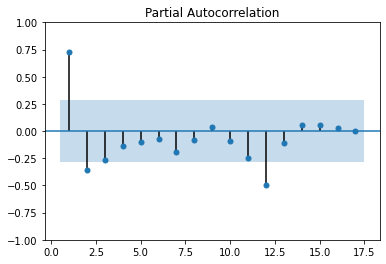

In [ ]:
plot_pacf(df1,zero=False);

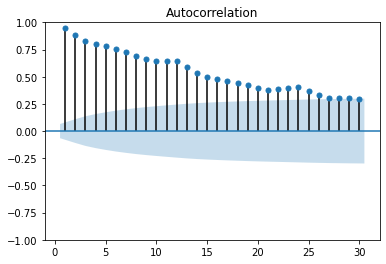

In [ ]:
plot_acf(df2,missing="drop",zero=False);

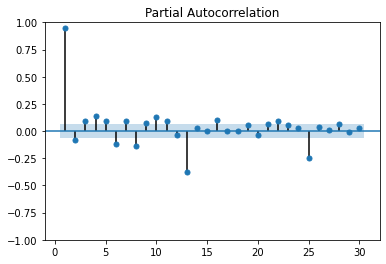

In [ ]:
plot_pacf(df2,zero=False);

In [ ]:
# Dickey-Fuller test
# Ho: data is NOT stationary
# Ha: data is stationary
# If p-value < 0.05, we reject Ho and conclude Ha, i.e. the data is stationary and 
# we can build and ARMA model
# If p-value > 0.05, we fail to reject Ho and conclude that the data is not stationary
p_value = adfuller(df1['URate'])[1]
p_value

0.0016833268949713795

In [ ]:
# Apply KPSS test to see if data is stationary around constant (level/mean):
# Ho: data is level stationary 
# Ha: data is not stationary
# reject Ho if p_value < 0.05
# data is stationary if p-value >0.05, and not stationary if p-value < 0.05
p_value = kpss(df1,regression = 'c',nlags='auto')[1]
p_value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



0.1

In [ ]:
# Check if data is stationary around trend
p_value = kpss(df1,regression = 'ct',nlags='auto')[1]
p_value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



0.1

In [ ]:
print(pmd.arima.ndiffs(df1,test='kpss'))
print(pmd.arima.ndiffs(df1,test='adf'))

0
1


In [ ]:
# OCSBT and CH tests
n_ocsb = pmd.arima.nsdiffs(df1,m=12,test='ocsb')
n_ch = pmd.arima.nsdiffs(df1,m=12,test='ch')
print(n_ocsb)
print(n_ch)

0
0


In [ ]:
# Dickey-Fuller test
# Ho: data is NOT stationary
# Ha: data is stationary
# If p-value < 0.05, we reject Ho and conclude Ha, i.e. the data is stationary and 
# we can build and ARMA model
# If p-value > 0.05, we fail to reject Ho and conclude that the data is not stationary
p_value = adfuller(df2['URate'])[1]
p_value

0.02927428485784148

In [ ]:
# Apply KPSS test to see if data is stationary around constant (level/mean):
# Ho: data is level stationary 
# Ha: data is not stationary
# reject Ho if p_value < 0.05
# data is stationary if p-value >0.05, and not stationary if p-value < 0.05
p_value = kpss(df2,regression = 'c',nlags='auto')[1]
p_value

0.03965522597870421

In [ ]:
# Check if data is stationary around trend
p_value = kpss(df2,regression = 'ct',nlags='auto')[1]
p_value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



0.01

In [ ]:
print(pmd.arima.ndiffs(df2,test='kpss'))
print(pmd.arima.ndiffs(df2,test='adf'))

1
1


In [ ]:
# OCSBT and CH tests
n_ocsb = pmd.arima.nsdiffs(df2,m=12,test='ocsb')
n_ch = pmd.arima.nsdiffs(df2,m=12,test='ch')
print(n_ocsb)
print(n_ch)

0
0


**Differentiation**

In [ ]:
# 1st Order Difference for data
# Instead of working with y1, y2, y3, y4,...  <- not stationary 
# We will work with differenced data (1st order non seasonal differences): y2-y1, y3-y2, y4-y3,.... <- stationary 

df1_diff1 = df1.diff(1).dropna()

# Perform tests
print(adfuller(df1_diff1)[1])
print(kpss(df1_diff1,regression = 'c',nlags='auto')[1])

6.15304675990833e-06
0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



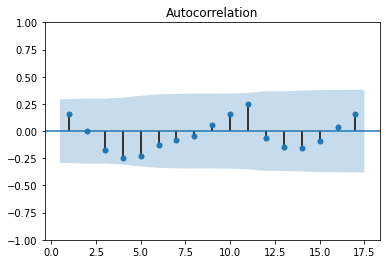

In [ ]:
plot_acf(df1_diff1,missing="drop",zero=False);

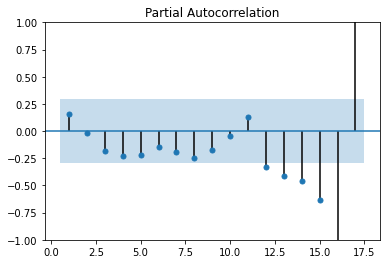

In [ ]:
plot_pacf(df1_diff1,zero=False);

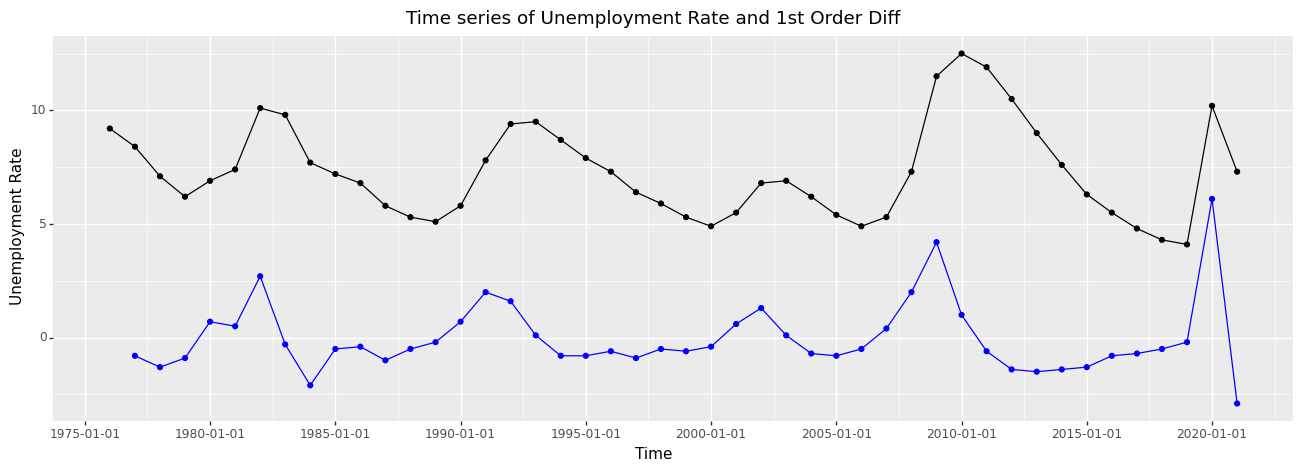

<ggplot: (8769666056505)>

In [ ]:
# Plotting Time Series of 1st order Diff
(
    ggplot(df1,aes(df1.index,'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate and 1st Order Diff") +
    geom_point(df1_diff1,aes(df1_diff1.index,'URate'),color='blue') + geom_line(df1_diff1, aes(df1_diff1.index,'URate'),color='blue') +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

In [ ]:
# 1st Order Difference for data
# Instead of working with y1, y2, y3, y4,...  <- not stationary 
# We will work with differenced data (1st order non seasonal differences): y2-y1, y3-y2, y4-y3,.... <- stationary 

df2_diff1 = df2.diff(1).dropna()

# Perform tests
print(adfuller(df2_diff1)[1])
print(kpss(df2_diff1,regression = 'c',nlags='auto')[1])

1.048508602239539e-13
0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



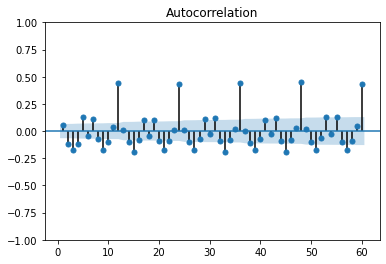

In [ ]:
plot_acf(df2_diff1,missing="drop",zero=False,lags=60);

In [ ]:
# Since we have monthly data we will perform 1st order seasonal differencing
# y13 - y1, y14 - y2, ....
df2_diff12 = df2.diff(12).dropna()

# Perform tests
print(adfuller(df2_diff12)[1])
print(kpss(df2_diff12,regression = 'c',nlags='auto')[1])

5.95468986828756e-10
0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



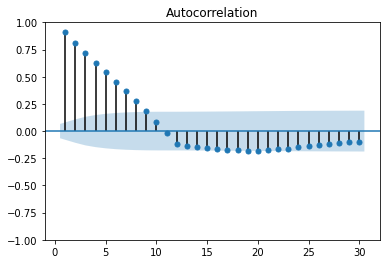

In [ ]:
plot_acf(df2_diff12,missing="drop",zero=False);

In [ ]:
# Combining both 1st Order diff and Seasonal Diff
df2_diff13 = df2.diff(12).diff(1).dropna()

# Perform tests
print(adfuller(df2_diff13)[1])
print(kpss(df2_diff13,regression = 'c',nlags='auto')[1])

3.2307585550020156e-26
0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



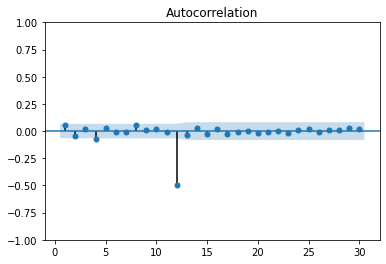

In [ ]:
plot_acf(df2_diff13,missing="drop",zero=False);

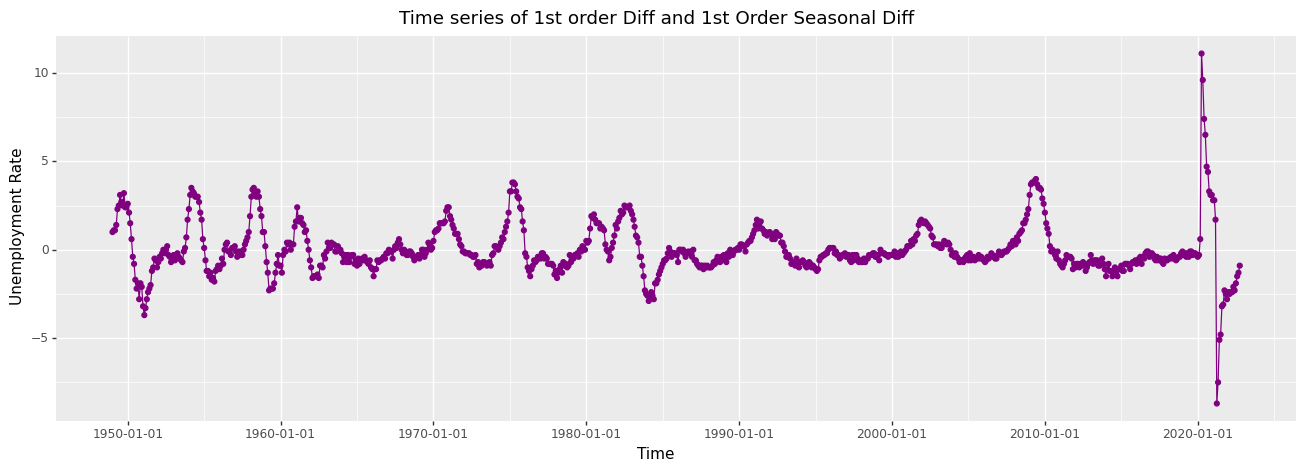

<ggplot: (8769670591413)>

In [ ]:
# Plotting Time Series with combined diff
(
    ggplot(df2_diff12,aes(df2_diff12.index,'URate', group = 1)) + geom_point(color='purple') + geom_line(color='purple') + ggtitle("Time series of 1st order Diff and 1st Order Seasonal Diff") +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

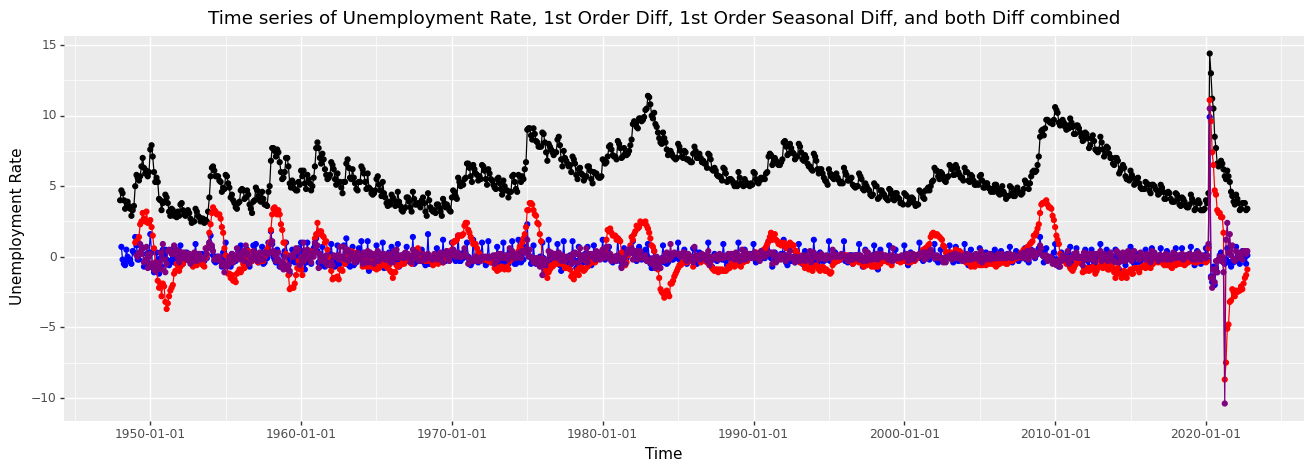

<ggplot: (8769666199541)>

In [ ]:
# Plotting Time Series of 1st order Diff, 1st order Seasonal Diff, and combined diff
(
    ggplot(df2,aes(df2.index,'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate, 1st Order Diff, 1st Order Seasonal Diff, and both Diff combined") +
    geom_point(df2_diff1,aes(df2_diff1.index,'URate'),color='blue') + geom_line(df2_diff1, aes(df2_diff1.index,'URate'),color='blue') +
    geom_point(df2_diff12,aes(df2_diff12.index,'URate'),color='red') + geom_line(df2_diff12, aes(df2_diff12.index,'URate'),color='red') +
    geom_point(df2_diff13,aes(df2_diff13.index,'URate'),color='purple') + geom_line(df2_diff13, aes(df2_diff13.index,'URate'),color='purple') +  
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

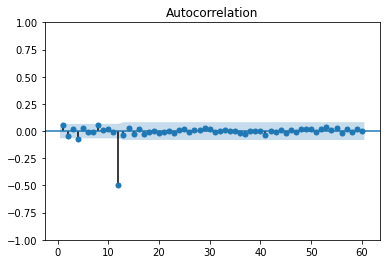

In [ ]:
# To build a model we need to examine ACF and PACF graphs
plot_acf(df2_diff13, lags=60, missing='drop',zero=False);

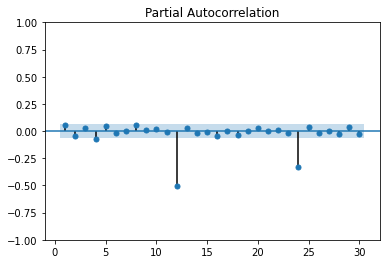

In [ ]:
plot_pacf(df2_diff13,zero=False);

**Model Selection**

In [ ]:
# ARIMA(p,d,q) where he (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

M1_1 = ARIMA(df1['URate'],order=(1,0,0))
M1_2 = ARIMA(df1['URate'],order=(0,0,1))
M1_3 = ARIMA(df1['URate'],order=(1,0,1))

M1_1_fit = M1_1.fit()
M1_2_fit = M1_2.fit()
M1_3_fit = M1_3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided,

In [ ]:
# Examine model outcomes
M1_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                   46
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -82.183
Date:                Thu, 24 Nov 2022   AIC                            170.366
Time:                        04:34:18   BIC                            175.852
Sample:                    01-01-1976   HQIC                           172.421
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3885      1.011      7.307      0.000       5.407       9.370
ar.L1          0.7076      0.116      6.101      0.000       0.480       0.935
sigma2         2.0548      0.473      4.347      0.000       1.128       2.981
===================================================================================
Ljung-Box (L1) (Q):                   2.82   Jarque-Bera (JB):                40.77
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               3.83   Skew:                             1.71
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
M1_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                   46
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -83.617
Date:                Thu, 24 Nov 2022   AIC                            173.234
Time:                        04:34:18   BIC                            178.720
Sample:                    01-01-1976   HQIC                           175.289
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2586      0.546     13.293      0.000       6.188       8.329
ma.L1          0.8904      0.136      6.549      0.000       0.624       1.157
sigma2         2.1456      0.395      5.436      0.000       1.372       2.919
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.28   Prob(JB):                         0.03
Heteroskedasticity (H):               4.34   Skew:                             0.72
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
M1_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                   46
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -80.302
Date:                Thu, 24 Nov 2022   AIC                            168.604
Time:                        04:34:18   BIC                            175.919
Sample:                    01-01-1976   HQIC                           171.344
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3054      0.997      7.327      0.000       5.351       9.260
ar.L1          0.5567      0.226      2.458      0.014       0.113       1.001
ma.L1          0.3593      0.215      1.670      0.095      -0.062       0.781
sigma2         1.8861      0.429      4.393      0.000       1.045       2.728
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                42.86
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.58   Skew:                             1.42
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# ARIMA(p,d,q) where he (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

M2_1 = ARIMA(df2['URate'],order=(1,1,0))
M2_2 = ARIMA(df2['URate'],order=(0,1,1))
M2_3 = ARIMA(df2['URate'],order=(1,1,1))

M2_1_fit = M2_1.fit()
M2_2_fit = M2_2.fit()
M2_3_fit = M2_3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequen

In [ ]:
# Examine model outcomes
M2_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                  898
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -778.301
Date:                Thu, 24 Nov 2022   AIC                           1560.601
Time:                        04:34:20   BIC                           1570.199
Sample:                    01-01-1948   HQIC                          1564.268
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0564      0.016      3.526      0.000       0.025       0.088
sigma2         0.3320      0.002    140.881      0.000       0.327       0.337
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            341266.10
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             5.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
M2_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                  898
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -777.891
Date:                Thu, 24 Nov 2022   AIC                           1559.782
Time:                        04:34:20   BIC                           1569.380
Sample:                    01-01-1948   HQIC                          1563.449
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0716      0.015      4.794      0.000       0.042       0.101
sigma2         0.3317      0.002    141.155      0.000       0.327       0.336
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            339464.20
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             5.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
M2_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                  898
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -769.449
Date:                Thu, 24 Nov 2022   AIC                           1544.898
Time:                        04:34:20   BIC                           1559.295
Sample:                    01-01-1948   HQIC                          1550.399
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9420      0.016     60.603      0.000       0.912       0.972
ma.L1         -0.9947      0.007   -143.173      0.000      -1.008      -0.981
sigma2         0.3251      0.002    132.528      0.000       0.320       0.330
===================================================================================
Ljung-Box (L1) (Q):                   6.09   Jarque-Bera (JB):            358488.00
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             6.19
Prob(H) (two-sided):                  0.00   Kurtosis:                       100.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df2.iloc[864]

URate    4.0
Name: 2020-01-01 00:00:00, dtype: float64

In [ ]:
df2['M2_1'] = M2_1_fit.predict(start=(len(df2)-13),end=len(df2),dynamic=True)
df2['M2_2'] = M2_2_fit.predict(start=(len(df2)-13),end=len(df2),dynamic=True)
df2['M2_3'] = M2_3_fit.predict(start=(len(df2)-13),end=len(df2),dynamic=True)

In [ ]:
df2["Time"] = list(range(0,len(df2)))

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 9 rows containing missing values.


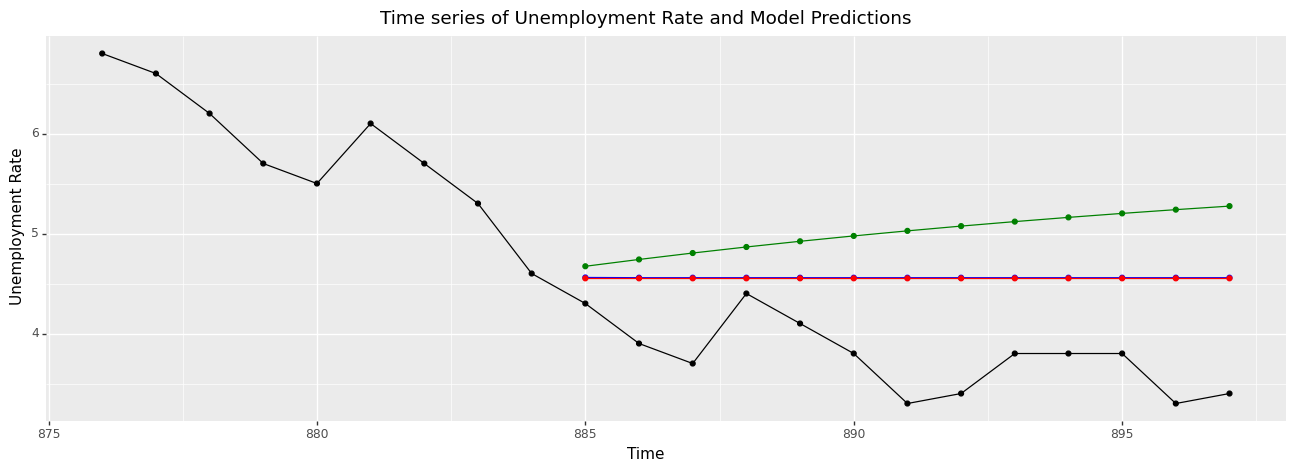

<ggplot: (8769665780205)>

In [ ]:
# Plotting Time Series of ARIMA models
(
    ggplot(df2.loc[df2['Time']>875],aes("Time",'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate and Model Predictions") +
    geom_point(aes("Time",'M2_1'),color='blue') + geom_line(aes("Time",'M2_1'),color='blue') +
    geom_point(aes("Time",'M2_2'),color='red') + geom_line(aes("Time",'M2_2'),color='red') +
    geom_point(aes("Time",'M2_3'),color='green') + geom_line(aes("Time",'M2_3'),color='green') +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

In [ ]:
# Seasonal ARIMA model with exogenous variables (X)
M2_4 = sm.tsa.statespace.SARIMAX(df2['URate'],order=(1,0,0),seasonal_order=(1,1,1,12)) # 12 = 12 months per one seasonal cycle (one year)
M2_4_fit = M2_4.fit()
df2['M2_4'] = M2_4_fit.predict(start=(len(df2)-13),end=len(df2),dynamic=True)

M2_4_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                URate   No. Observations:                  898
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -541.559
Date:                              Thu, 24 Nov 2022   AIC                           1091.117
Time:                                      04:34:25   BIC                           1110.264
Sample:                                  01-01-1948   HQIC                          1098.437
                                       - 10-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9652      0.009    111.161      0.000       0.948       0.982
ar.S.L12      -0.0371      0.024     -1.554      0.120      -0.084       0.010
ma.S.L12      -0.8730      0.016    -53.358      0.000      -0.905      -0.841
sigma2         0.1946      0.001    222.346      0.000       0.193       0.196
===================================================================================
Ljung-Box (L1) (Q):                   4.25   Jarque-Bera (JB):           4342320.47
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               5.03   Skew:                            14.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       344.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Seasonal ARIMA model with exogenous variables (X)
M2_5 = sm.tsa.statespace.SARIMAX(df2['URate'],order=(0,0,1),seasonal_order=(1,1,1,12)) # 12 = 12 months per one seasonal cycle (one year)
M2_5_fit = M2_5.fit()
df2['M2_5'] = M2_5_fit.predict(start=(len(df2)-13),end=len(df2),dynamic=True)

M2_5_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              URate   No. Observations:                  898
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1092.772
Date:                            Thu, 24 Nov 2022   AIC                           2193.545
Time:                                    04:34:32   BIC                           2212.692
Sample:                                01-01-1948   HQIC                          2200.865
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8548      0.008    101.021      0.000       0.838       0.871
ar.S.L12       0.6054      0.031     19.452      0.000       0.544       0.666
ma.S.L12      -0.9857      0.039    -25.147      0.000      -1.062      -0.909
sigma2         0.6696      0.010     63.963      0.000       0.649       0.690
===================================================================================
Ljung-Box (L1) (Q):                 246.59   Jarque-Bera (JB):             34818.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                             2.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 9 rows containing missing values.


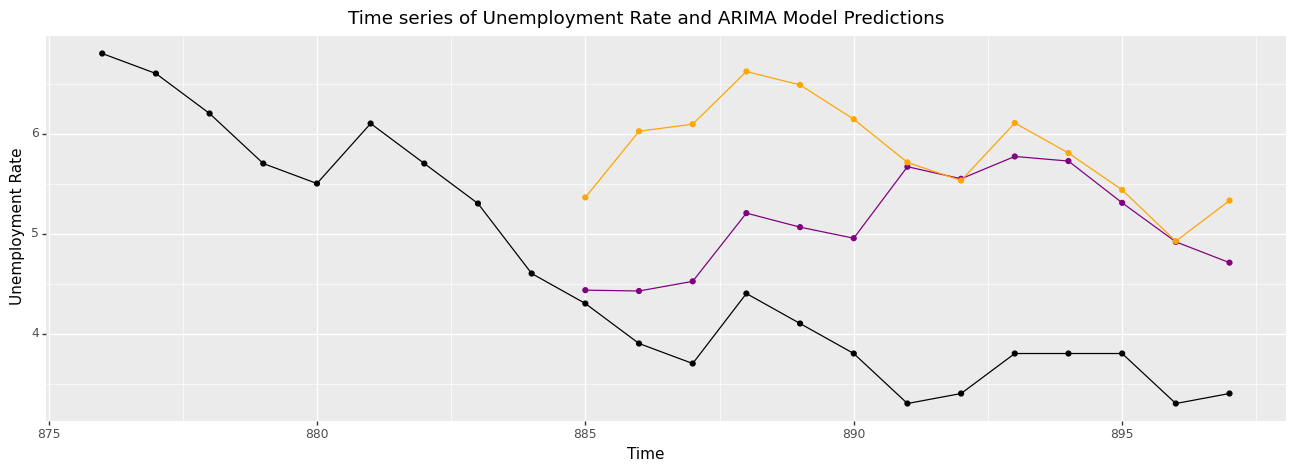

<ggplot: (8769665693173)>

In [ ]:
# Plotting Time Series with ARIMA models
(
    ggplot(df2.loc[df2['Time']>875],aes("Time",'URate', group = 1)) + geom_point() + geom_line() + ggtitle("Time series of Unemployment Rate and ARIMA Model Predictions") +
    geom_point(aes("Time",'M2_4'),color='purple') + geom_line(aes("Time",'M2_4'),color='purple') +
    geom_point(aes("Time",'M2_5'),color='orange') + geom_line(aes("Time",'M2_5'),color='orange') +
    xlab("Time") + ylab("Unemployment Rate") + theme(figure_size=(16, 5))
    )

**GENERATE FORECAST**

In [ ]:
df1.iloc[45]

URate    7.3
Name: 2021-01-01 00:00:00, dtype: float64

In [ ]:
df2.iloc[866]

URate      4.5
M2_1       NaN
M2_2       NaN
M2_3       NaN
Time     866.0
M2_4       NaN
M2_5       NaN
Name: 2020-03-01 00:00:00, dtype: float64

In [ ]:
# Using champion model
M_C1 = ARIMA(df1['URate'],order=(1,0,1))
M_C1_fit = M_C1.fit()

# Storing fitted values and predictions
df1['M_C1'] = M_C1_fit.fittedvalues
df1['M_C1_P'] = M_C1_fit.predict(start=44,end=45,dynamic=True)

# Time column
df1["Time"] = list(range(0,len(df1)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.


In [ ]:
# Using champion model
M_C2 = sm.tsa.statespace.SARIMAX(df2['URate'],order=(1,0,0),seasonal_order=(1,1,1,12))
M_C2_fit = M_C2.fit()

# Storing fitted values and predictions
df2['M_C2'] = M_C2_fit.fittedvalues
df2['M_C2_P'] = M_C2_fit.predict(start=866,end=len(df2),dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 44 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 44 rows containing missing values.


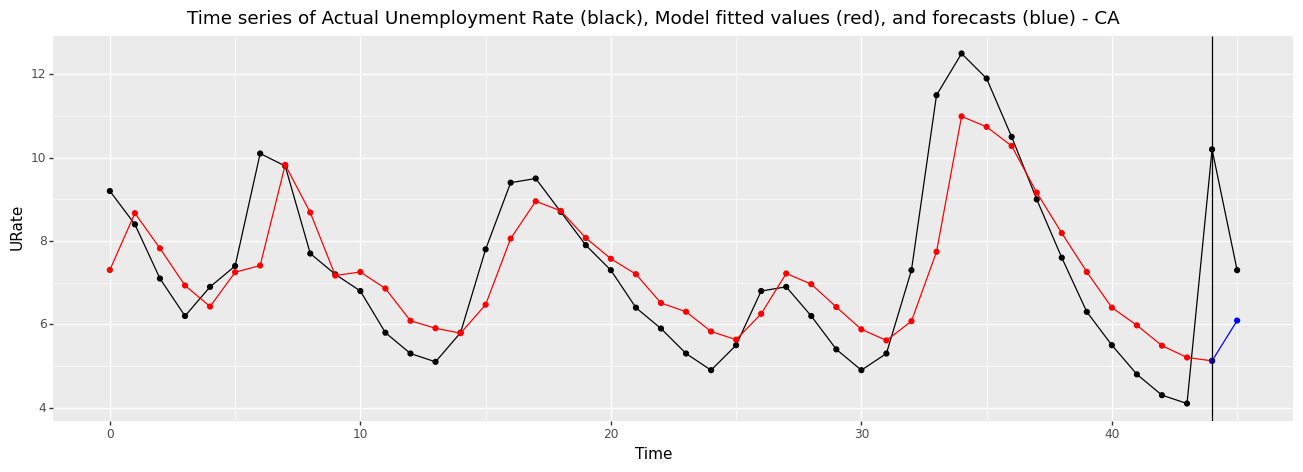

<ggplot: (8769668948809)>

In [ ]:
(
    ggplot(df1,aes("Time",'URate')) + geom_point() + geom_line()+
 geom_point(df1.loc[df1['Time']<45],aes("Time",'M_C1'),color='red') + geom_line(df1.loc[df1['Time']<45],aes("Time",'M_C1'),color='red') +
 geom_point(aes("Time",'M_C1_P'),color='blue') + geom_line(aes("Time",'M_C1_P'),color='blue') +
 geom_vline(xintercept = 44) + theme(figure_size=(16, 5)) + ggtitle("Time series of Actual Unemployment Rate (black), Model fitted values (red), and forecasts (blue) - CA")
)

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 45 rows containing missing values.
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 45 rows containing missing values.


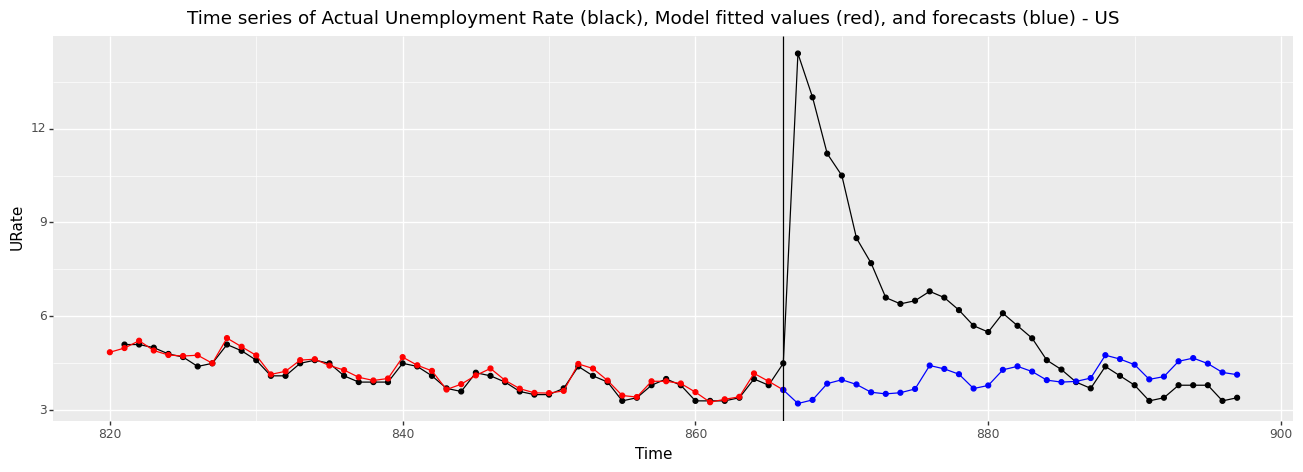

<ggplot: (8769668938253)>

In [ ]:
(
    ggplot(df2.loc[df2['Time']>820],aes("Time",'URate')) + geom_point() + geom_line()+
 geom_point(df2.loc[df2['Time'].between(820, 866)],aes("Time",'M_C2'),color='red') + geom_line(df2.loc[df2['Time'].between(820, 866)],aes("Time",'M_C2'),color='red') +
 geom_point(aes("Time",'M_C2_P'),color='blue') + geom_line(aes("Time",'M_C2_P'),color='blue') +
 geom_vline(xintercept = 866) + theme(figure_size=(16, 5)) + ggtitle("Time series of Actual Unemployment Rate (black), Model fitted values (red), and forecasts (blue) - US")
)

In [ ]:
# Building RMSE and MAPE functions
def rmse(actual,predicted):
    return round(((actual - predicted)**2).mean()**0.5,2)

def mape(actual,predicted):
    return round(abs((actual - predicted)/actual).mean()*100,2)

# Building accuracy function using above functions
def accuracy(actual,predicted,n):
    n_train = n
    accuracy_metrics = pd.DataFrame(columns=['RMSE','MAPE(%)'],index=['Training set','Testing set'])
    accuracy_metrics.loc['Training set','RMSE'] = rmse(actual[:n_train],predicted[:n_train])
    accuracy_metrics.loc['Training set','MAPE(%)'] = mape(actual[:n_train],predicted[:n_train])
    if (n>0):
        accuracy_metrics.loc['Testing set','RMSE'] = rmse(actual[n_train:],predicted[n_train+ 1:])
        accuracy_metrics.loc['Testing set','MAPE(%)'] = mape(actual[n_train:],predicted[n_train+ 1:])
    return accuracy_metrics

In [ ]:
print("Champion Model - CA:")
acc_1 = accuracy(df1['URate'], df1['M_C1'], 44)
acc_1

Champion Model - CA:


,RMSE,MAPE(%)
Training set,1.08,11.83
Testing set,3.44,47.14


In [ ]:
print("Champion Model - CA:")
acc_2 = accuracy(df2['URate'], df2['M_C2'], 866)
acc_2

Champion Model - CA:


,RMSE,MAPE(%)
Training set,0.51,4.86
Testing set,1.97,9.44


**AUTO-ARIMA MODEL**

In [ ]:
# Build an ARIMA model: use last 12 months to test your model

train,test = model_selection.train_test_split(df1["URate"],test_size=12)

In [ ]:
M1_A = pmd.auto_arima(train, start_p=0, d=None, start_q=0, max_p=3, max_d=1, max_q=3, 
                   max_order=10,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.725, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.962, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=111.566, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=233.652, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103.954, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=99.422, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=97.818, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=99.535, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=100.953, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111.957, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.913 seconds


In [ ]:
# Build an ARIMA model: use last 3 years to test your model

train,test = model_selection.train_test_split(df2["URate"],test_size=36)

In [ ]:
M2_A = pmd.auto_arima(train, start_p=0, d=None, start_q=0, max_p=3, max_d=1, max_q=3, 
                   start_P=0, D=None, start_Q=0, max_P=1, max_D=1, max_Q=1, max_order=10, m=12,
                   trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1122.904, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=319.386, Time=1.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=740.244, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1120.907, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1118.863, Time=0.18 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6.345, Time=3.59 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=739.950, Time=1.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=27.498, Time=2.35 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-29.106, Time=5.56 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=741.899, Time=1.39 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=281.714, Time=1.92 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1105.783, Time=0.37 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=-32.913, Time=5.61 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=724.864, Time=1.53 sec
 ARIMA(3,1,0)(1,0,0)[12] interce

In [ ]:
M1_A = ARIMA(df1['URate'],order=(2,0,0))
M1_A_fit = M1_A.fit()

df1["M1_A"] = M1_A_fit.fittedvalues
df1["M1_Aresid"] = M1_A_fit.resid
M1_A_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  URate   No. Observations:                   46
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -79.192
Date:                Thu, 24 Nov 2022   AIC                            166.385
Time:                        05:11:38   BIC                            173.699
Sample:                    01-01-1976   HQIC                           169.125
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2822      0.870      8.366      0.000       5.576       8.988
ar.L1          0.9697      0.147      6.593      0.000       0.681       1.258
ar.L2         -0.3614      0.133     -2.725      0.006      -0.621      -0.101
sigma2         1.7928      0.406      4.421      0.000       0.998       2.588
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                41.89
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.84   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

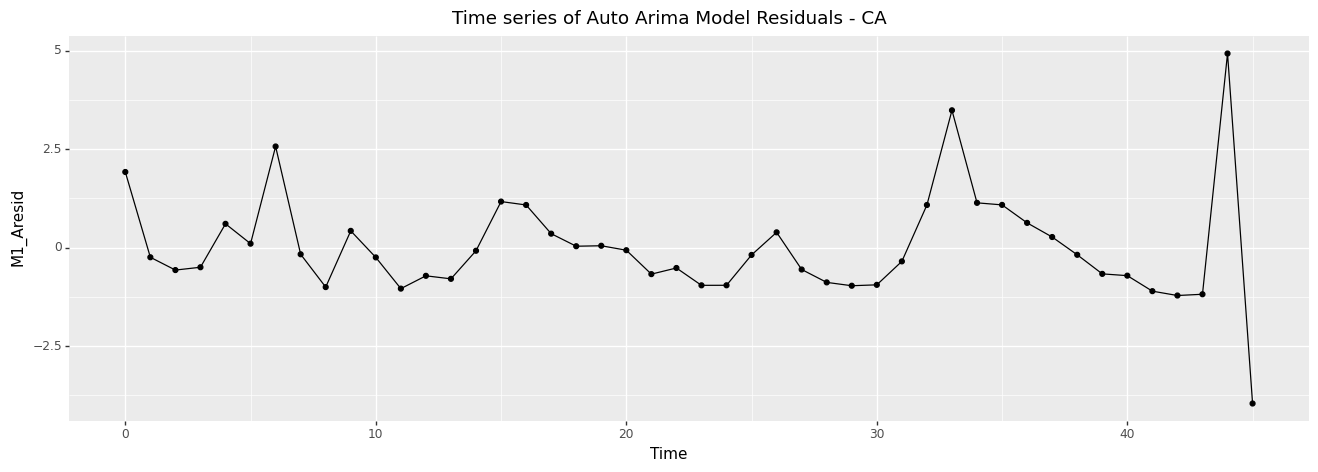

<ggplot: (8769668880725)>

In [ ]:
(
    ggplot(df1,aes("Time",'M1_Aresid')) + geom_point() + geom_line()+
    theme(figure_size=(16, 5)) + ggtitle("Time series of Auto Arima Model Residuals - CA")
)

In [ ]:
M2_A = sm.tsa.statespace.SARIMAX(df2['URate'],order=(2,1,1),seasonal_order=(1,0,1,12))
M2_A_fit = M2_A.fit()

df2["M2_A"] = M2_A_fit.fittedvalues
df2["M2_Aresid"] = M2_A_fit.resid
M2_A_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              URate   No. Observations:                  898
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -549.555
Date:                            Thu, 24 Nov 2022   AIC                           1111.110
Time:                                    05:11:49   BIC                           1139.904
Sample:                                01-01-1948   HQIC                          1122.111
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7131      0.125     -5.691      0.000      -0.959      -0.467
ar.L2         -0.0051      0.017     -0.299      0.765      -0.039       0.028
ma.L1          0.7741      0.125      6.207      0.000       0.530       1.019
ar.S.L12       0.9899      0.004    226.832      0.000       0.981       0.998
ma.S.L12      -0.8756      0.015    -58.876      0.000      -0.905      -0.846
sigma2         0.1959      0.001    201.117      0.000       0.194       0.198
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4073439.08
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.45   Skew:                            14.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       331.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

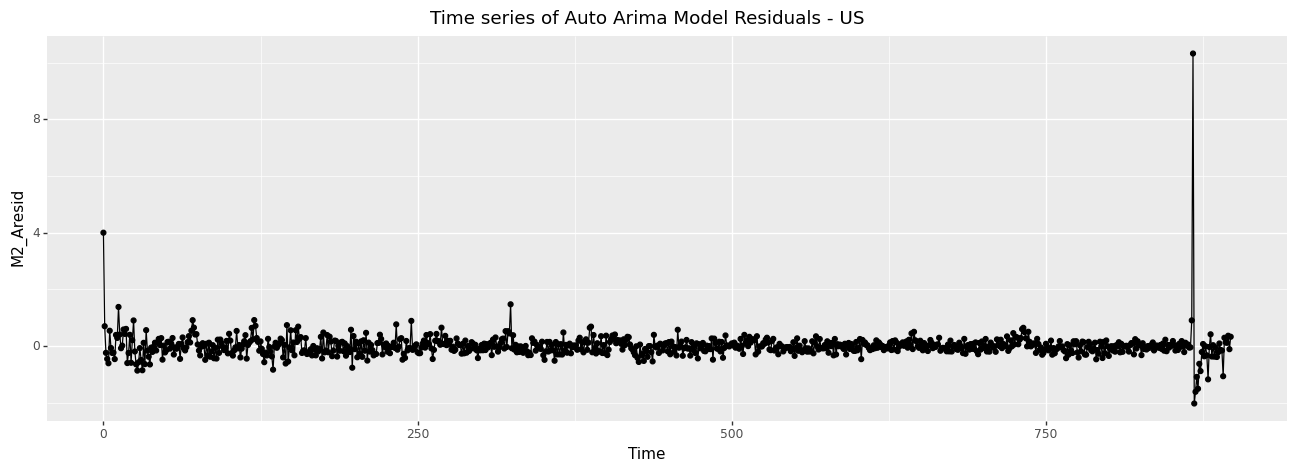

<ggplot: (8769664569181)>

In [ ]:
(
    ggplot(df2,aes("Time",'M2_Aresid')) + geom_point() + geom_line()+
    theme(figure_size=(16, 5)) + ggtitle("Time series of Auto Arima Model Residuals - US")
)

In [ ]:
print("Champion Auto Model - CA:")
acc_3 = accuracy(df1['URate'], df1['M1_A'], 44)
acc_3

Champion Auto Model - CA:


,RMSE,MAPE(%)
Training set,1.01,11.17
Testing set,3.96,54.27


In [ ]:
print("Champion Auto Model - US:")
acc_4 = accuracy(df2['URate'], df2['M2_A'], 866)
acc_4

Champion Auto Model - US:


,RMSE,MAPE(%)
Training set,0.29,3.61
Testing set,1.98,9.87
